Group Members:

Aliya Gilley,
Anushka Gami,
J.A Canty

## Spotify Through the Last Decade





**Motivation**: Drawing from one of the more significant sources of data pertaining to the sorts of music people listen to, Spotify, we would like to understand music listening trends in the past decade. What music from the last decade truly deserved the label, "popular"? Born out of a general interest in music and the understanding that the pandemic (2020 -->) will have most likely have shifted overall music tastes (That's a project for another time).


**Research Questions:**

Descriptive Analytics Questions: 
What is the relationship between top genre and popularity? \ How does this relationship between genre and popularity change as the years go on? This is interesting to explore if we're to determine what sorts of genres dominate the spotify charts.


Inference Research Question:
Is there an association Between Artist type and popularity of their song? Or, in other words, we would like to test whether the average popularity of a song is different based on it being produced by a solo, duo, trio, or band type artist for all songs on spotify within the last decade. This is interesting to explore since we would like to capture what modern taste in music is when it comes to the amount of people involved in the making of a song. Do we still like bands, as has been the case off and on since the 40s? Or are solo artists like elvis and micheal jackson still more of our flavor?



Linear Regression Research Questions:
Is there a linear relationship between popularity and energy, bpm, value, and duration in the sample? What about in the relevant population? This is relevant for a more acoustic analysis of the songs presented in the dataset. Though we're not music majors, we surmise there existing a relationship between the liveliness of a song and it's tempo.


Logistic Regression Research questions:
Is there a linear relationship between the log-odds of the success level of artist type (solo vs. duo/trio/group) and dB, value, acousticness, and duration?
This is important to investigate for the same reasons mentioned in our linear regression research questions.







**Dataset:**









In [43]:
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import norm, t
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [44]:
df = pd.read_excel("Spotify 2010 - 2019 Top 100 Songs.xlsx")
df

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,23,203,0,6,70,2010,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138,89,68,-4,36,83,192,1,8,68,2010,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,72,2010,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93,87,66,-4,4,38,180,11,12,80,2010,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104,85,69,-6,9,74,268,39,5,79,2010,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SICKO MODE,Travis Scott,hip hop,2018,2020‑06‑22,155,73,83,-4,12,45,313,1,22,86,2019,Solo
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019,2020‑06‑22,80,50,55,-9,80,41,190,23,7,85,2019,Solo
997,Boasty (feat. Idris Elba),Wiley,grime,2019,2020‑06‑22,103,77,89,-5,9,46,177,1,7,68,2019,Solo
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019,2020‑08‑20,138,58,53,-6,10,59,214,1,10,67,2019,Duo


In [45]:
df.shape

(1000, 17)

In [46]:
df.dtypes 

title            object
artist           object
top genre        object
year released     int64
added            object
bpm               int64
nrgy              int64
dnce              int64
dB                int64
live              int64
val               int64
dur               int64
acous             int64
spch              int64
pop               int64
top year          int64
artist type      object
dtype: object

In [47]:

df['artist type'].unique()

array(['Duo', 'Solo', 'Band/Group', 'Trio'], dtype=object)



The spotify hits dataset contains the following variables for previous hits listed from 2010-2019.

title: the song's title

artist: the song's artist

top genre: the genre of the song

year released: year song was released

added: day song was added to Spotify's Top Hits

bpm: beats per minute - the tempo of the song

nrgy: energy - how energetic the song is

dnce: danceability - how easy it is to dance to the song

dB: decibel - how loud the song is

live: how likely the song is a live recording

val: how positive the mood of the song is

dur: duration of song

acous: how acoustic song is

spch: the more the song is focused on spoken word

pop: popularity of the song (not ranking)

top year: year the song was a top hit

artist type: tells if an artist is a solo, duo, trio, or a band

## Descriptive Analytics


What is the relationship between top genre and popularity? \ How does this relationship between genre and popularity change as the years go on? 

In [48]:
genre_avg_pop = df[['top genre', 'pop']].groupby(['top genre']).mean().astype("category").sort_values(by='pop', ascending=True).reset_index()
genre_avg_pop

,top genre,pop
0,dutch house,42.0
1,deep disco house,44.0
2,electro house,45.0
3,lilith,46.0
4,dancefloor dnb,49.0
...,...,...
127,dfw rap,84.3
128,australian psych,88.0
129,bedroom pop,88.0
130,dark clubbing,89.0


In [49]:
top_5_genres = genre_avg_pop.sort_values('pop', ascending=False)[:5]
top_5_genres

,top genre,pop
131,chill pop,94.0
130,dark clubbing,89.0
129,bedroom pop,88.0
128,australian psych,88.0
127,dfw rap,84.3


In [50]:
bottom_5_genres = genre_avg_pop.sort_values('pop', ascending=True)[:5]
bottom_5_genres

,top genre,pop
0,dutch house,42.0
1,deep disco house,44.0
2,electro house,45.0
3,lilith,46.0
4,dancefloor dnb,49.0


In [51]:
genre_avg_pop['pop'] = genre_avg_pop['pop'].astype(int)

In [52]:
frames = [top_5_genres, bottom_5_genres]
result = pd.concat(frames)
display(result)

,top genre,pop
131,chill pop,94.0
130,dark clubbing,89.0
129,bedroom pop,88.0
128,australian psych,88.0
127,dfw rap,84.3
0,dutch house,42.0
1,deep disco house,44.0
2,electro house,45.0
3,lilith,46.0
4,dancefloor dnb,49.0


In [53]:
result.describe()

,top genre,pop
count,10,10.0
unique,10,9.0
top,chill pop,88.0
freq,1,2.0


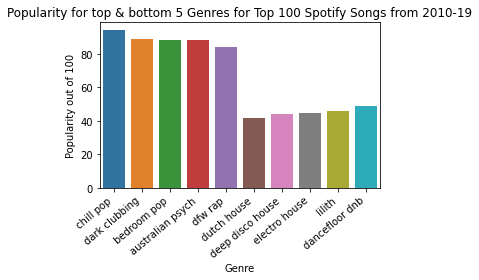

In [54]:

ax = sns.barplot(x = 'top genre', y = genre_avg_pop["pop"], data = result)
plt.xlabel('Genre')
plt.ylabel('Popularity out of 100')
plt.title('Popularity for top & bottom 5 Genres for Top 100 Spotify Songs from 2010-19')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

pop and club music seemed to take the cake for most popular within the last decade, with more obscure genres like lilith falling short.

# Inference



Inference Research Question: Is there an association Between Artist type and popularity of their song? Or, in other words, we would like to test whether the average popularity of a song is different based on it being produced by a solo, duo, trio, or band type artist for all songs on spotify within the last decade.


 

 Will this generalize to the population, that is, the totality of the data? (100 most popular songs on spotify in the last decade)

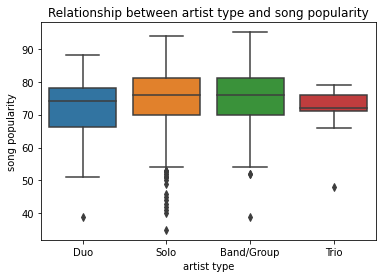

In [55]:
sns.boxplot(x = 'artist type', y = 'pop', data = df) 
plt.title('Relationship between artist type and song popularity') 
plt.ylabel('song popularity') 
plt.show() 

At a surface-level view, we can reap some insights from our data. It seems that the most popular songs were played by bands. Will this remain true with further analysis? let's fit our model.



In [73]:
df.columns = df.columns.str.replace(" ","_")
results = smf.ols('pop ~ artist_type', data = df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     3.378
Date:                Wed, 04 May 2022   Prob (F-statistic):             0.0178
Time:                        11:25:45   Log-Likelihood:                -3589.0
No. Observations:                1000   AIC:                             7186.
Df Residuals:                     996   BIC:                             7206.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              75.4083      0.675    111.696      0.000      74.083      76.733
artist_type[T.Duo]     -3.2797      1.247     -2.629      0.009      -5.728      -0.832
artist_type[T.Solo]    -0.3775      0.748     -0.505      0.614      -1.844       1.089
artist_type[T.Trio]    -4.3314      2.526     -1.715      0.087      -9.288       0.626
==============================================================================
Omnibus:                      145.047   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.575
Skew:                          -0.936   Prob(JB):                     3.49e-53
Kurtosis:                       4.515   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Hypothesis**

${H_o}:$ $\mu$solo = $\mu$duo = $\mu$trio  = $\mu$band/group

${H_a}:$ at least one of my population means $\mu$ is different from the others




Where:

*   $\mu$solo = The average popularity of songs for solo arists
*  $\mu$duo = The average popularity of songs for duos
*   $\mu$trio = The average popularity of songs for trios
*   $\mu$band = The average popularity of songs for Bands








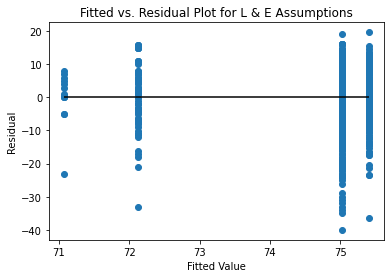

In [76]:

plt.scatter(results.fittedvalues, results.resid) 
plt.hlines(y = 0, xmin = np.min(results.fittedvalues), xmax = np.max(results.fittedvalues))
plt.ylabel('Residual') 
plt.xlabel('Fitted Value') 
plt.title('Fitted vs. Residual Plot for L & E Assumptions') 
plt.show() 

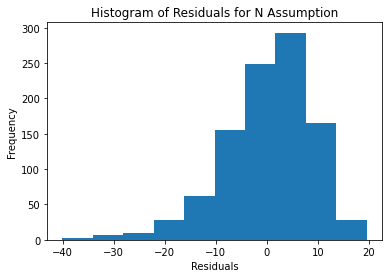

In [77]:
plt.hist(results.resid) 
plt.xlabel('Residuals') 
plt.ylabel('Frequency') 
plt.title('Histogram of Residuals for N Assumption') 
plt.show() 

BASELINE LEVEL: Level represented by the intercept. In our case, groups/bands.

**Conditions**
Let's go over our conditions for one-way ANOVA.


L- To check whether the true relationship is linear, I should look at the first fitted vs. residuals plot and see if my points are centered around the line added. This seems possible, although I do notice many
observations with really low residuals.

I ‑ To "check" this assumption as best I can, I verify that I have a random sample of Spotify Songs (from the background above) and that I have less than 10% of the population size in my sample (n = 1000). As far as I can tell from these criteria, independence is valid.

N ‑ The histogram does not support normality of the error terms, as the histogram is skewed left.

E ‑ I do not seem to have equal variances, as I see that the latter two fitted values are more variable (have more spread out residuals) than the initial set of two observations.

There is no multicollinearity condition, as this is simple linear regression with a categorical predictor.

In general, my assumptions are not met.






In [78]:
results.summary().tables[0]

Dep. Variable:,pop,R-squared:,0.010
Model:,OLS,Adj. R-squared:,0.007
Method:,Least Squares,F-statistic:,3.378
Date:,"Wed, 04 May 2022",Prob (F-statistic):,0.0178
Time:,11:43:27,Log-Likelihood:,-3589.0
No. Observations:,1000,AIC:,7186.
Df Residuals:,996,BIC:,7206.
Df Model:,3,,
Covariance Type:,nonrobust,,


**Calculating the p value**

From the provided output, the t stat is 3.378 and and p-value is 0.0178. At a significance level of 0.05, I reject my null hypothesis.

**Conclusion**

Therefore, I would conclude that I do in fact have sufficient evidence to suggest that at least one of my population mean popularity levels for spotify songs is different from the rest based on the type of artist who made it
(solo, duo, trio, band/group).

**Back to the research question**
 There certainly seems to be an association between how many artists were involved in a song and whether or not that song was popular on spotify within the last decade. As we determined the null hypothesis to be true, this is generalizable to the rest of the population of spotify songs.


## Linear Regression 



Is there a linear relationship between popularity and energy, bpm, value, and duration in the sample? What about in the relevant population?

In [18]:

results = smf.ols('pop ~ nrgy+bpm+val+dur', data = df).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     16.75
Date:                Wed, 04 May 2022   Prob (F-statistic):           2.70e-13
Time:                        03:16:02   Log-Likelihood:                -3561.5
No. Observations:                1000   AIC:                             7133.
Df Residuals:                     995   BIC:                             7158.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     82.2495      2.332     35.265      0.000      77.673      86.826
nrgy          -0.1496      0.018     -8.139      0.000      -0.186      -0.114
bpm            0.0018      0.010      0.169      0.866      -0.019       0.022
val            0.0408      0.014      2.971      0.003       0.014       0.068
dur            0.0032      0.007      0.461      0.645      -0.010       0.017
==============================================================================
Omnibus:                      129.678   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.830
Skew:                          -0.865   Prob(JB):                     4.50e-46
Kurtosis:                       4.422   Cond. No.                     2.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


$\hat{y}$
 = 82.2495 - 0.1496(nrgy) + 0.0018(bpm) + 0.0408(val) + 0.0032(dur)

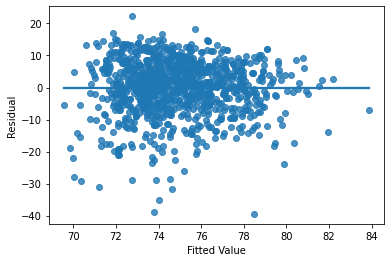

In [19]:
sns.regplot(x=results.fittedvalues, y=results.resid, ci=None) 
plt.ylabel('Residual') 
plt.xlabel('Fitted Value') 
plt.show()

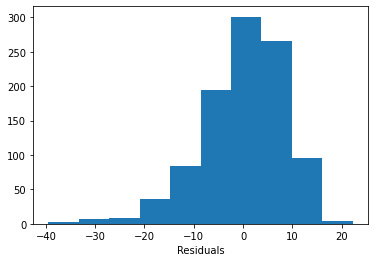

In [20]:
plt.hist(results.resid) 
plt.xlabel('Residuals') 
plt.show()


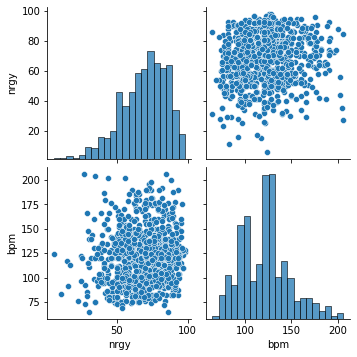

In [21]:
sns.pairplot(df[["nrgy", "bpm"]]) 
plt.show()

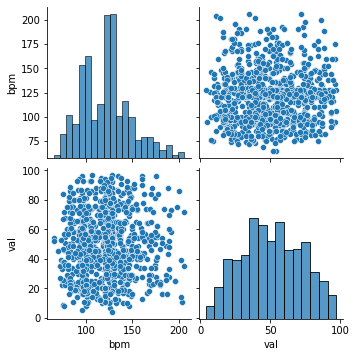

In [22]:
sns.pairplot(df[["bpm", "val"]]) 
plt.show()

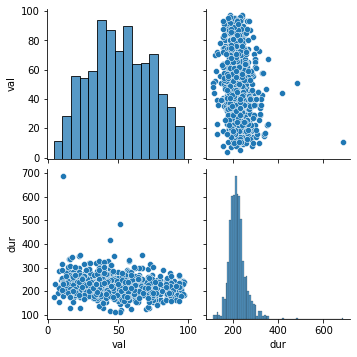

In [23]:
sns.pairplot(df[["val", "dur"]]) 
plt.show()

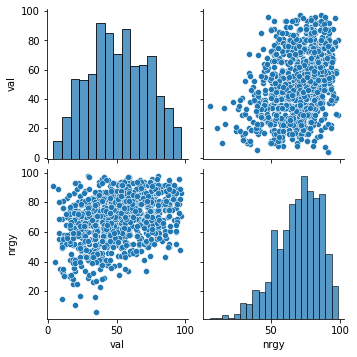

In [24]:
sns.pairplot(df[["val", "nrgy"]]) 
plt.show()

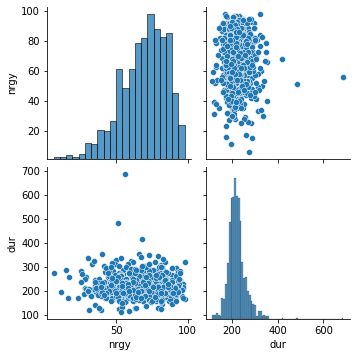

In [25]:
sns.pairplot(df[["nrgy", "dur"]]) 
plt.show()

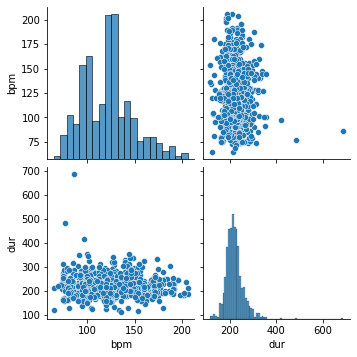

In [26]:
sns.pairplot(df[["bpm", "dur"]]) 
plt.show()

For the linearity condition, the number of values above and below the line look roughly equal which means the condition is met.

The constant variance in residuals condition is not met since the y-axis spread changes as we move from left to right in the scatterplot shown above.

The third condition is not met since the histogram above is not symmetric. However, it is unimodal and does appear to be centered at 0.

This is not a random sample of Spotify songs that came out from 2010-19 since it is the top 100 hits. However, it does represent less than 10% of all songs that came out on Spotify during this time period.

The numerical explanatory variables (energy, bpm, duration, value) do not have a strong linear relationship between any of them. Thus the explanatory variables are not collinear and so this condition (just for multiple linear regression) is met.

The model says that 5.9% of the variability in the response variable (popularity) can be explained by the linear relationship with the explanatory variables (energy, value, beats per minute, and duration). This is a quite low which makes for a weak model.

Suppose that a given Spotify song from 2010-19 has an energy of 80, is at a tempo of 120 bpm, has a value of 70, and a duration of 305. \ What is the predicted popularity for this song?

In [27]:
results.predict(exog=dict(nrgy=80, bpm=120, val = 70, dur=305))

0    74.315373
dtype: float64

${H}_O$
: the slopes in our model are all 0 \

${H}_a$
: at least one slope is non-zero

In [28]:
f_stat = 16.75
p_value = 2.70 * 10**-13

Our p-value is quite small. At any reasonable alpha value, I have sufficient evidence to suggest that at least one population slope is non-zero for predicting popularity based on energy, bpm, value, and duration.

## Logistic Regression 


Is there a linear relationship between the log-odds of the success level of artist type (solo vs. duo/trio/group) and dB, value, acousticness, and duration?

In [29]:
df["is solo"] = df["artist type"].map({'Solo': 1, 'Duo': 0, 'Band/Group': 0, 'Trio': 0}).astype(int)
df


,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type,is solo
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,23,203,0,6,70,2010,Duo,0
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138,89,68,-4,36,83,192,1,8,68,2010,Duo,0
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,72,2010,Solo,1
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93,87,66,-4,4,38,180,11,12,80,2010,Solo,1
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104,85,69,-6,9,74,268,39,5,79,2010,Solo,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SICKO MODE,Travis Scott,hip hop,2018,2020‑06‑22,155,73,83,-4,12,45,313,1,22,86,2019,Solo,1
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019,2020‑06‑22,80,50,55,-9,80,41,190,23,7,85,2019,Solo,1
997,Boasty (feat. Idris Elba),Wiley,grime,2019,2020‑06‑22,103,77,89,-5,9,46,177,1,7,68,2019,Solo,1
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019,2020‑08‑20,138,58,53,-6,10,59,214,1,10,67,2019,Duo,0


In [30]:
df_logistic_regression = df[['dB', 'val', 'acous', 'dur', 'is solo']]
df_logistic_regression

,dB,val,acous,dur,is solo
0,-6,23,0,203,0
1,-4,83,1,192,0
2,-7,96,20,243,1
3,-4,38,11,180,1
4,-6,74,39,268,1
...,...,...,...,...,...
995,-4,45,1,313,1
996,-9,41,23,190,1
997,-5,46,1,177,1
998,-6,59,1,214,0


In [31]:
X = df_logistic_regression[['dB', 'val', 'acous', 'dur']]
y = df_logistic_regression['is solo']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train

,dB,val,acous,dur
382,-5,28,0,293
994,-6,71,1,171
982,-10,23,29,354
47,-3,94,3,213
521,-7,28,25,253
...,...,...,...,...
767,-11,18,17,259
72,-5,84,33,248
908,-6,41,23,207
235,-7,72,59,245


In [33]:
df_train = X_train
df_train['y'] = y_train
df_train

,dB,val,acous,dur,y
382,-5,28,0,293,1
994,-6,71,1,171,1
982,-10,23,29,354,0
47,-3,94,3,213,1
521,-7,28,25,253,1
...,...,...,...,...,...
767,-11,18,17,259,1
72,-5,84,33,248,0
908,-6,41,23,207,1
235,-7,72,59,245,1


In [34]:
df_test = X_test
df_test['y'] = y_test
df_test

,dB,val,acous,dur,y
507,-5,40,4,284,1
818,-5,81,21,201,1
452,-6,88,2,190,0
368,-6,48,1,231,1
242,-6,33,4,171,1
...,...,...,...,...,...
430,-4,94,30,235,1
874,-8,33,15,173,1
550,-5,25,2,224,1
608,-5,42,8,209,1


In [35]:
df_train

,dB,val,acous,dur,y
382,-5,28,0,293,1
994,-6,71,1,171,1
982,-10,23,29,354,0
47,-3,94,3,213,1
521,-7,28,25,253,1
...,...,...,...,...,...
767,-11,18,17,259,1
72,-5,84,33,248,0
908,-6,41,23,207,1
235,-7,72,59,245,1


In [36]:
current_mod=smf.logit('y~dB+val+acous+dur', data=df_train).fit()
print('ITERATION 1: BIC of the Current Model',current_mod.bic)

Optimization terminated successfully.
         Current function value: 0.554832
         Iterations 5
ITERATION 1: BIC of the Current Model 921.1540366753543


In [37]:
#remove dB
current_mod=smf.logit('y~val+acous+dur', data=df_train).fit()
print('ITERATION 1: BIC of the Current Model',current_mod.bic)

Optimization terminated successfully.
         Current function value: 0.555370
         Iterations 6
ITERATION 1: BIC of the Current Model 915.3310482866984


In [38]:
#remove val
current_mod=smf.logit('y~dB+acous+dur', data=df_train).fit()
print('ITERATION 1: BIC of the Current Model',current_mod.bic)

Optimization terminated successfully.
         Current function value: 0.557719
         Iterations 5
ITERATION 1: BIC of the Current Model 919.0889067529895


In [39]:
#remove acous
current_mod=smf.logit('y~dB+val+dur', data=df_train).fit()
print('ITERATION 1: BIC of the Current Model',current_mod.bic)

Optimization terminated successfully.
         Current function value: 0.556685
         Iterations 5
ITERATION 1: BIC of the Current Model 917.4337707869918


In [40]:
#remove dur
current_mod=smf.logit('y~dB+val+acous', data=df_train).fit()
print('ITERATION 1: BIC of the Current Model',current_mod.bic)

Optimization terminated successfully.
         Current function value: 0.559315
         Iterations 5
ITERATION 1: BIC of the Current Model 921.6420472360563


In [41]:
#remove dB and val
current_mod=smf.logit('y~acous+dur', data=df_train).fit()
print('ITERATION 1: BIC of the Current Model',current_mod.bic)

Optimization terminated successfully.
         Current function value: 0.559311
         Iterations 5
ITERATION 1: BIC of the Current Model 914.9522214300766


In [42]:
#remove dB and acous
current_mod=smf.logit('y~val+dur', data=df_train).fit()
print('ITERATION 1: BIC of the Current Model',current_mod.bic)

Optimization terminated successfully.
         Current function value: 0.558228
         Iterations 5
ITERATION 1: BIC of the Current Model 913.2184877160195


In [43]:
#remove dB and dur
current_mod=smf.logit('y~acous+dur', data=df_train).fit()
print('ITERATION 1: BIC of the Current Model',current_mod.bic)

Optimization terminated successfully.
         Current function value: 0.559311
         Iterations 5
ITERATION 1: BIC of the Current Model 914.9522214300766


In [44]:
#remove dB and acous and val
current_mod=smf.logit('y~dur', data=df_train).fit()
print('ITERATION 1: BIC of the Current Model',current_mod.bic)

Optimization terminated successfully.
         Current function value: 0.563223
         Iterations 5
ITERATION 1: BIC of the Current Model 914.5266829461556


In [45]:
#remove dB and acous and dur
current_mod=smf.logit('y~val', data=df_train).fit()
print('ITERATION 1: BIC of the Current Model',current_mod.bic)

Optimization terminated successfully.
         Current function value: 0.562673
         Iterations 5
ITERATION 1: BIC of the Current Model 913.6458851161311


removing dB and acous yielded the lowest BIC. No other model had a lower BIC, which means we can stop the algorithm

In [46]:
#remove dB and acous
current_mod=smf.logit('y~val+dur', data=df_train).fit()
print('ITERATION 1: BIC of the Current Model',current_mod.bic)

Optimization terminated successfully.
         Current function value: 0.558228
         Iterations 5
ITERATION 1: BIC of the Current Model 913.2184877160195


In [47]:
final_mod=smf.logit('y~val+dur', data=df_train).fit()
final_mod.summary()

Optimization terminated successfully.
         Current function value: 0.558228
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  800
Model:                          Logit   Df Residuals:                      797
Method:                           MLE   Df Model:                            2
Date:                Wed, 04 May 2022   Pseudo R-squ.:                 0.01446
Time:                        03:16:37   Log-Likelihood:                -446.58
converged:                       True   LL-Null:                       -453.13
Covariance Type:            nonrobust   LLR p-value:                  0.001428
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9110      0.559      5.209      0.000       1.816       4.006
val           -0.0109      0.004     -2.810      0.005      -0.018      -0.003
dur           -0.0057      0.002     -2.669      0.008      -0.010      -0.002
==============================================================================
"""

$log(\frac{\hat{p}}{1 - \hat{p}}) = 2.9110 − 0 0109(val)−0.0057(dur)$




${H_o}$: the slopes for value and duration are zero \ ${H_a}$: the slopes for either value or duration are non-zero

In [48]:
#test for val
point_estimate = -0.0109
standard_error = 0.004
null_value=0
test_statistic = (point_estimate-null_value)/standard_error
test_statistic 

-2.725

In [49]:
pvalue = 2*(1-norm.cdf(np.abs(test_statistic)))
pvalue

0.006430148706787486

In [50]:
#test for dur
point_estimate = -0.0057
standard_error = 0.002
null_value = 0
test_statistic = (point_estimate-null_value)/standard_error
test_statistic 

-2.85

In [51]:
pvalue = 2*(1 - norm.cdf(np.abs(test_statistic)))
pvalue

0.0043719229098264645

The two p-values of 0.006430148706787486 and 0.0043719229098264645 are both below an alpha value of 0.05 which means that we reject the null hypothesis that the slopes for duration and value are 0 in our model.

In [52]:
final_mod_test=smf.logit('y~val+dur', data=df_test).fit()
final_mod_test.summary()

Optimization terminated successfully.
         Current function value: 0.556113
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:                          Logit   Df Residuals:                      197
Method:                           MLE   Df Model:                            2
Date:                Wed, 04 May 2022   Pseudo R-squ.:                0.001189
Time:                        03:16:41   Log-Likelihood:                -111.22
converged:                       True   LL-Null:                       -111.36
Covariance Type:            nonrobust   LLR p-value:                    0.8760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7104      1.147      0.619      0.536      -1.538       2.958
val           -0.0002      0.008     -0.020      0.984      -0.016       0.016
dur            0.0019      0.004      0.459      0.646      -0.006       0.010
==============================================================================
"""

In [56]:
fprs, tprs, thresholds = roc_curve(y_true=df_test['y'], y_score=final_mod_test.fittedvalues)

In [57]:
auc = roc_auc_score(y_true=df_test['y'], y_score=final_mod_test.fittedvalues)
print(auc)

0.5125016894174889


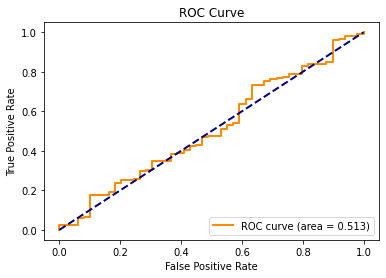

In [58]:
def plot_roc(fpr, tpr, auc, lw=2): 
   plt.plot(fpr, tpr, color='darkorange', lw=lw, 
            label='ROC curve (area = '+str(round(auc,3))+')') 
   plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') 
   plt.xlabel('False Positive Rate') 
   plt.ylabel('True Positive Rate') 
   plt.title('ROC Curve') 
   plt.legend(loc="lower right") 
   plt.show() 
plot_roc(fprs, tprs, auc)

In [59]:
pred_probabilities=final_mod.predict(exog=dict(df_test))  
df_test['predictive_prob']=pred_probabilities 
df_test

,dB,val,acous,dur,y,predictive_prob
507,-5,40,4,284,1,0.700523
818,-5,81,21,201,1,0.706764
452,-6,88,2,190,0,0.704052
368,-6,48,1,231,1,0.743918
242,-6,33,4,171,1,0.828219
...,...,...,...,...,...,...
430,-4,94,30,235,1,0.632682
874,-8,33,15,173,1,0.826583
550,-5,25,2,224,1,0.795177
608,-5,42,8,209,1,0.778617


In [60]:
df_test['yhat']=1*(df_test['predictive_prob']>0.7) 
df_test.head() 

,dB,val,acous,dur,y,predictive_prob,yhat
507,-5,40,4,284,1,0.700523,1
818,-5,81,21,201,1,0.706764,1
452,-6,88,2,190,0,0.704052,1
368,-6,48,1,231,1,0.743918,1
242,-6,33,4,171,1,0.828219,1


In [61]:
tn, fp, fn, tp = confusion_matrix(y_true=df_test['y'],  
                                 y_pred=df_test['yhat']).ravel() 
(tn, fp, fn, tp)

(8, 41, 22, 129)

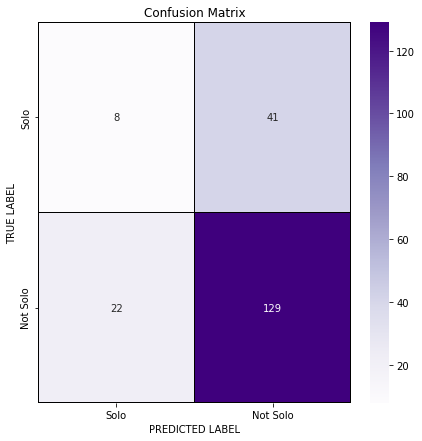

In [62]:
cm = confusion_matrix(y_true=df_test['y'], y_pred=df_test['yhat'])
x_axis_labels = ["Solo", "Not Solo"]
y_axis_labels = ["Solo", "Not Solo"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix')
#plt.savefig("lrcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

The false positive rate for the testing data is 41/200 and the true positive rate is 129/200.

The confusion matrix helped us learn that there are more false negatives than false positives, meaning that it is more likely to incorrectly categorize a solo artist as a non-solo one based on dB, value, acousticness, and duration than to incorrectly classify a group artist as a solo one. This is significant to our initial research question which dealt with the log-odds of the success level of artist type (solo vs. duo/trio/group) and dB, value, acousticness, and duration.

If I was a music blogger who exclusively liked to write about non-solo musicians such as bands and groups, these results would be significant to me. From that point of view, false negatives would be the worst thing to have. It would mean that I would potentially write about a solo artist while thinking they are a non-solo one and thereby wasting time. Not writing about a group because I thought they were a solo artist would be much less of a big deal.

# **Conclusion**



# **Summarization:**

**Descriptive Anallytics**

pop and club music seemed to take the cake for most popular within the last decade, with more obscure genres like lilith falling short.

**Inference:**
I would conclude that I do in fact have sufficient evidence to suggest that at least one of my population mean popularity levels for spotify songs is different from the rest based on the type of artist who made it (solo, duo, trio, band/group). That said, there certainly seems to be an association between how many artists were involved in a song and whether or not that song was popular on spotify within the last decade. As we determined the null hypothesis to be true, this is generalizable to the rest of the population of spotify songs.

**Linear Regression:**
Our p-value is quite small. At any reasonable alpha value, I have sufficient evidence to suggest that at least one population slope is non-zero for predicting popularity based on energy, bpm, value, and duration.

**Logistic Regression:**

The false positive rate for the testing data is 41/200 and the true positive rate is 129/200.

The confusion matrix helped us learn that there are more false negatives than false positives, meaning that it is more likely to incorrectly categorize a solo artist as a non-solo one based on dB, value, acousticness, and duration than to incorrectly classify a group artist as a solo one. This is significant to our initial research question which dealt with the log-odds of the success level of artist type (solo vs. duo/trio/group) and dB, value, acousticness, and duration.

If I was a music blogger who exclusively liked to write about non-solo musicians such as bands and groups, these results would be significant to me. From that point of view, false negatives would be the worst thing to have. It would mean that I would potentially write about a solo artist while thinking they are a non-solo one and thereby wasting time. Not writing about a group because I thought they were a solo artist would be much less of a big deal.






**Future Work:**

Future research questions might entail investigating the most popular artists (popularity ranking overall: amount of songs with high popularity level), and determining how the acoustical-makeup and/or genre of those songs influenced their popularity. This will answer questions like: To which artist(s) does the last decade belong?